In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

![](https://user-images.githubusercontent.com/36406676/52198187-54447c00-28a5-11e9-91da-a037f8cdd733.PNG)

## Activation_Functions

## Sigmoid

In [58]:
def Sigmoid(x):
    return 1 / ( 1+ np.exp(-x))

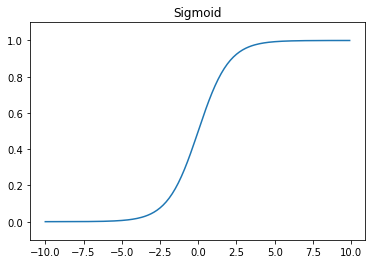

In [59]:
x = np.arange(-10,10,0.1)
y = Sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.title("Sigmoid")
plt.show()


## ReLU

In [60]:
def ReLU(x):
    return x * (x > 0)

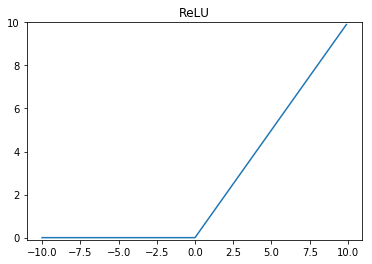

In [61]:
x = np.arange(-10,10,0.1)
y = ReLU(x)
plt.plot(x,y)
plt.ylim(-0.1,10)
plt.title("ReLU")
plt.show()

## Leaky ReLU

In [62]:
def Leaky_ReLU(x):
    return np.where(x > 0, x, x * 0.01)

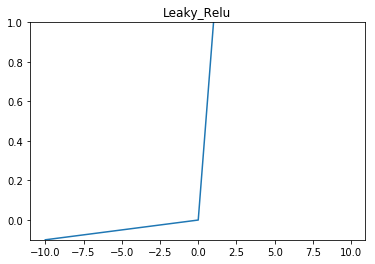

In [63]:
x = np.arange(-10,10,0.1)
y = Leaky_ReLU(x)
plt.plot(x,y)
plt.ylim(-0.1,1)
plt.title("Leaky_Relu")
plt.show()

## Tanh(x)

In [64]:
def Tanh(x):
    return (np.exp(2*x) -1) / (np.exp(2*x) +1)

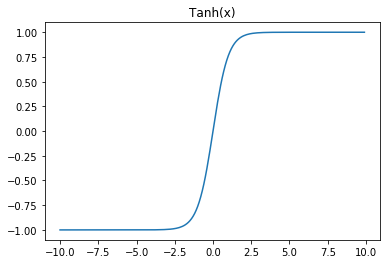

In [65]:
x = np.arange(-10,10,0.1)
y = Tanh(x)
plt.plot(x,y)
plt.title("Tanh(x)")
plt.ylim(-1.1,1.1)
plt.show()

## ELU

In [66]:
def ELU(x,a):
    return np.where(x>=0, x, a*(np.exp(x)-1))

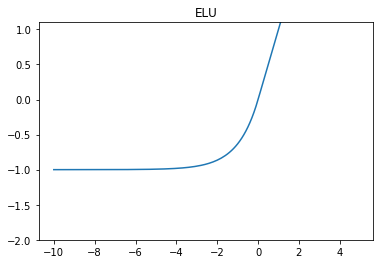

In [67]:
x = np.arange(-10,5,0.1)
y = ELU(x,1)
plt.plot(x,y)
plt.title("ELU")
plt.ylim(-2,1.1)
plt.show()

![](https://user-images.githubusercontent.com/36406676/52198102-1fd0c000-28a5-11e9-9dc6-ea97aa4943c8.PNG)

In [130]:
class Sigmoid:
    def __init__(self):
        pass
    
    def forward(self,x):
        self.x = x
        out = 1 / ( 1+ np.exp(-x))
        self.out = out
        return out
    
    def backward(self, dout):
        dx = (1-self.out)*(self.out)
        return dx
        

In [131]:
sigmoid_layer1 = Sigmoid()
sigmoid_layer2 = Sigmoid()
sigmoid_layer3 = Sigmoid()


In [132]:
x1 = 10
x2 = 0
x3 = -10

In [133]:
print(sigmoid_layer1.forward(x1)) # 1에 가까운 수
print(sigmoid_layer2.forward(x2)) # 0.5
print(sigmoid_layer3.forward(x3)) # 0에 가까운 수

0.9999546021312976
0.5
4.5397868702434395e-05


In [134]:
print(sigmoid_layer1.backward(1)) # 0에 가까움
print(sigmoid_layer2.backward(1)) # 0.25 정상
print(sigmoid_layer3.backward(1)) # 0에 가까움 gradient가 죽는다.

4.5395807735907655e-05
0.25
4.5395807735951673e-05


![](https://user-images.githubusercontent.com/36406676/52200301-c91ab480-28ab-11e9-89f2-216bf4e52be2.PNG)

In [141]:
class Relu:
    def __init__(self):
        pass
    
    def forward(self,x):
        self.x = x
        out= self.x * (self.x > 0)
        self.out = out
        return out
    
    def backward(self, dout):
        dx = np.where(self.x >=0, dout*self.x,0)
        return dx
        

In [142]:
relu_layer1 = Relu()
relu_layer2 = Relu()
relu_layer3 = Relu()


In [143]:
x1 = 10
x2 = 0
x3 = -10

In [144]:
print(relu_layer1.forward(x1)) # 10
print(relu_layer2.forward(x2)) # 0
print(relu_layer3.forward(x3)) # 0

10
0
0


In [145]:
print(relu_layer1.backward(1)) # 10
print(relu_layer2.backward(1)) #  0
print(relu_layer3.backward(1)) #  0 0보다 작은 구간에서 graident가 죽는ㄷ 

10
0
0


## Weight Initialization

## Batch Normalization